<h1>Question 1</h1>

In [68]:
# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [69]:
# Intensity Transformation
c = np.array([(50, 50), (50, 100), (150, 255),(150, 150)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[1, 1], c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t3 = np.linspace(c[3, 1], 255, 255-c[3, 0]).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

256


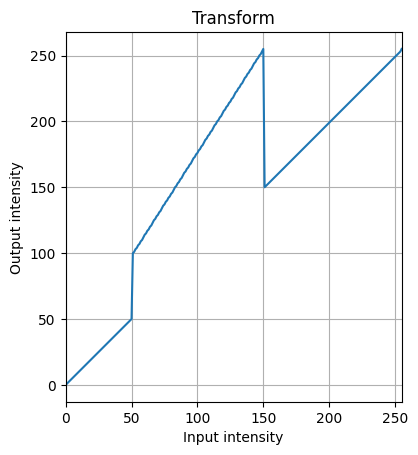

In [70]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title('Transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_aspect('equal')
ax.grid()
plt.show()

In [71]:
# Loading the Image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\emma.jpg', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'

In [72]:
# Applying the transformation
image_transformed = cv.LUT(img_org, transform)

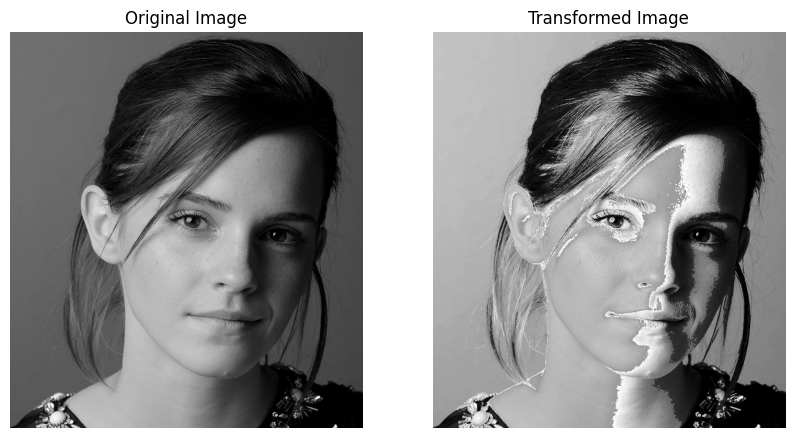

In [73]:
# Displaying the Original and Transformed Image
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_org, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()


<h1>Question 2</h1>

In [74]:
# Visualizing the image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_org)
cv.waitKey(0)
cv.destroyAllWindows()

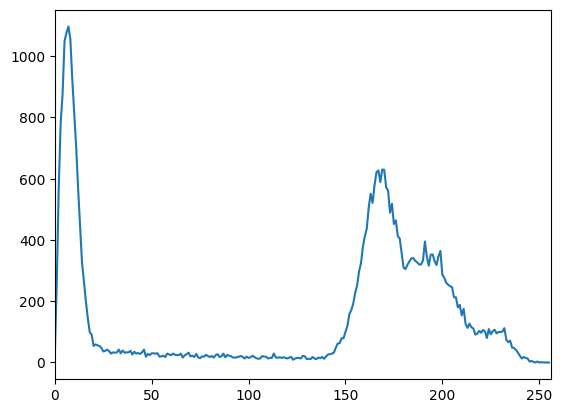

In [75]:
# Visualizing the Histogram
hist = cv.calcHist([img_org],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [76]:
# White Matter Accentuation
c = np.array([(50, 50), (175, 100), (175, 200)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0]-c[0, 0]).astype('uint8')
t3 = np.linspace(c[2 ,1], 255, 255-c[2, 0]).astype('uint8')
white_transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(white_transform))

256


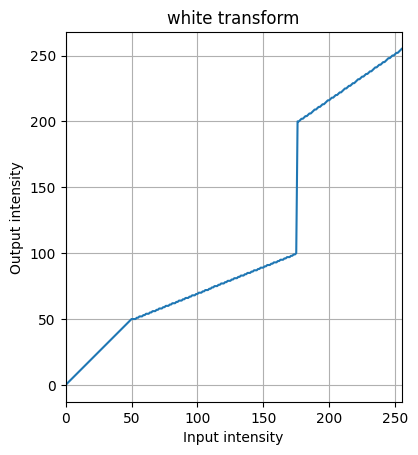

In [77]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(white_transform)
ax.set_title('white transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.grid
ax.set_aspect('equal')
ax.grid()
plt.show()

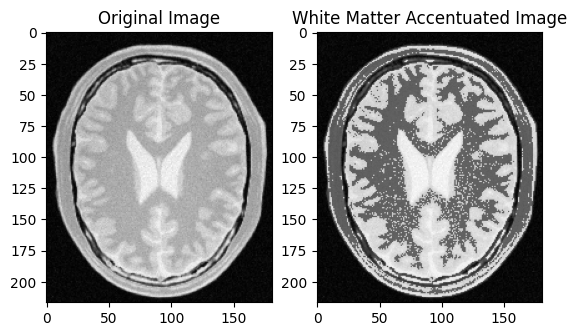

In [78]:
# Displaying the Original and Transformed Image
image_transformed_white = cv.LUT(img_org, white_transform)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(image_transformed_white, cmap="gray")
ax[1].set_title("White Matter Accentuated Image")

plt.show()

In [79]:
# Gray Matter Accentuation
c = np.array([(50, 50), (50, 100), (175, 200), (175, 0)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[1, 1], c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t3 = np.linspace(c[3 ,1], 0, 255-c[3, 0]).astype('uint8')
gray_transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(gray_transform))

256


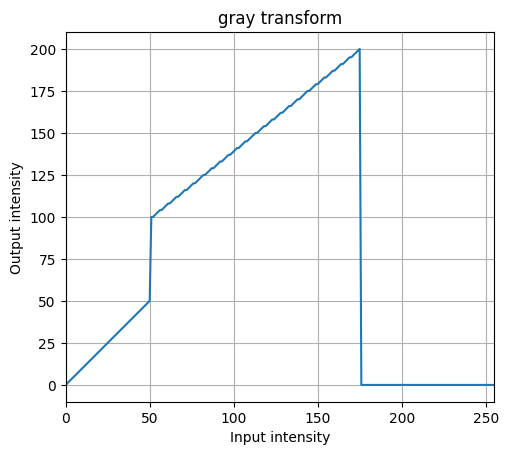

In [80]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(gray_transform)
ax.set_title('gray transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.grid
ax.set_aspect('equal')
ax.grid()
plt.show()

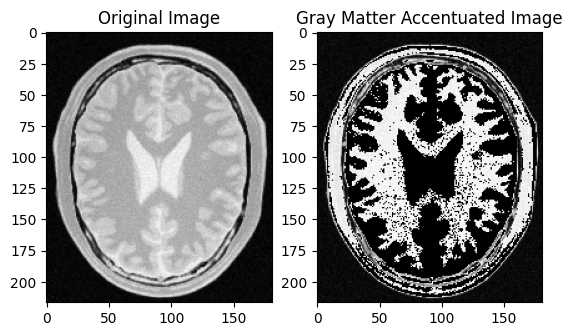

In [81]:
# Displaying the Original and Transformed Image
image_transformed_gray = cv.LUT(img_org, gray_transform)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(image_transformed_gray, cmap="gray")
ax[1].set_title("Gray Matter Accentuated Image")

plt.show()

<h1>Question 3</h1>

In [82]:
# Loading the image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\highlights_and_shadows.jpg')
if img_org is None: 
    assert False, 'Image could not be read'

In [83]:
# Converting the Image to L*a*b* Color Space
img_lab = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
# Extracting the L* Channel
img_l = img_lab[:,:,0]
# Gamma Value
gamma = 0.5
# Applying Gamma Correction to the L* Channel
img_corrected = np.power(img_l/ 255.0, gamma) * 255.0
# Puting the Processed L* Channel Back into the Image
img_lab[:,:,0] = img_corrected.astype('uint8')
# Converting the Image Back to RGB
img_gamma_corrected = cv.cvtColor(img_lab, cv.COLOR_LAB2RGB)

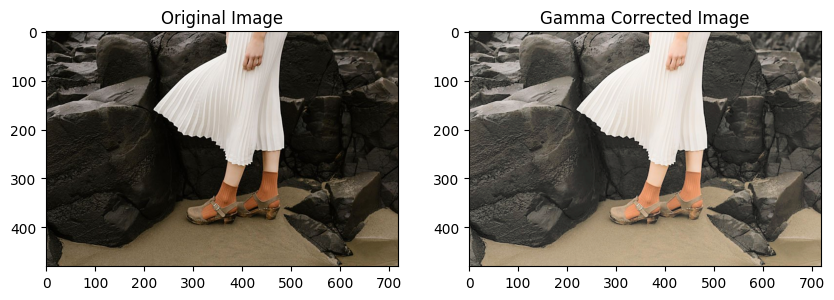

In [84]:
# Displaying the Original and Gamma Corrected Image
fig,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(img_gamma_corrected)
ax[1].set_title("Gamma Corrected Image")

plt.show()

Text(0.5, 1.0, 'Histogram of Gamma Corrected Image')

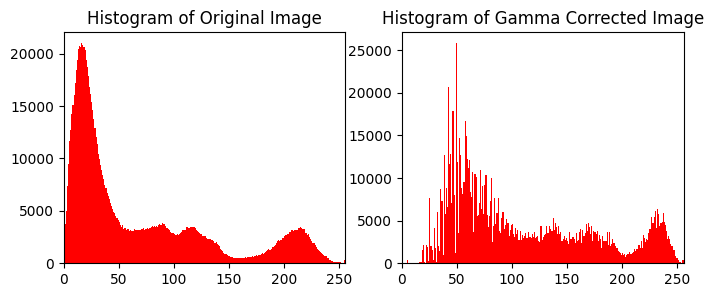

In [85]:
# Histogram of Original Image and Gamma Corrected Imag
fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].hist(img_org.flatten(), 256, [0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].set_title("Histogram of Original Image")

ax[1].hist(img_gamma_corrected.flatten(), 256, [0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].set_title("Histogram of Gamma Corrected Image")

<h1>Question 4</h1>

In [86]:
# Loading the Image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\spider.png')
if img_org is None:
    assert False, 'Image could not be read'

In [87]:
# Converting the Image to HSV Color Space
img_hsv = cv.cvtColor(img_org, cv.COLOR_BGR2HSV)
# Splitting the Image into hue, saturation and value planes
h, s, v = cv.split(img_hsv)

In [88]:
# Defining the Intensity Transformation Function
def intensity_transform(x, a, sigma):
    return min(x+a*128*np.exp((x-128)**2/(-2*sigma**2)), 255)
a = 0.6 # 0 <= a <= 1
sigma = 70
# Applying the Intensity Transformation to the Saturation Plane
s_transformed = np.zeros(s.shape, dtype='uint8')
for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        s_transformed[i,j] = intensity_transform(s[i,j], a, sigma)


Value of a for a visually pleasing output is 0.6

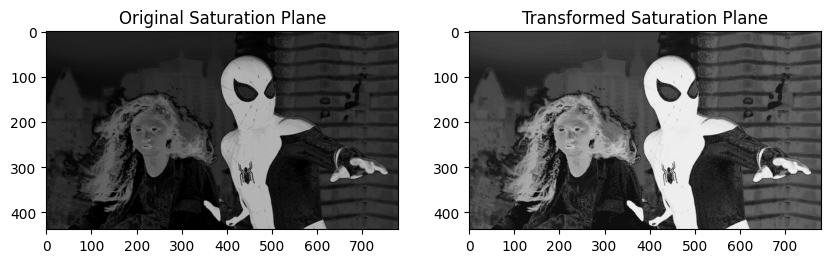

In [89]:
# Displaying the Original and Transformed Saturation Plane
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(s, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Saturation Plane")
ax[1].imshow(s_transformed, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Transformed Saturation Plane")
plt.show()

In [90]:
# Reconstructing the Image
img_hsv_transformed = cv.merge((h, s_transformed, v))

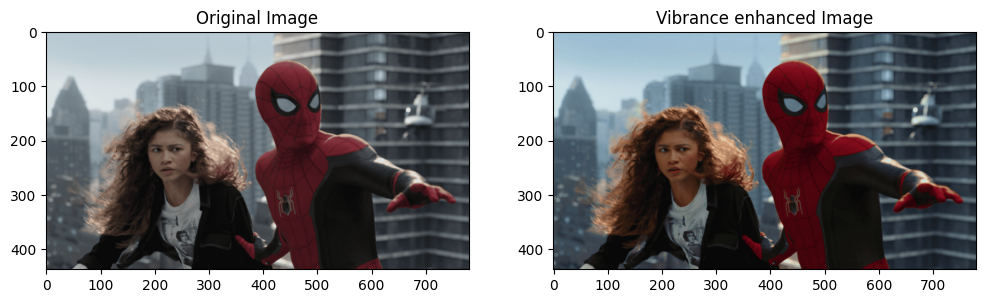

In [91]:
vibrance_enhanced_img = cv.cvtColor(img_hsv_transformed, cv.COLOR_HSV2RGB)
# Displaying the Original, Vibrance enhanced Image
fig,ax = plt.subplots(1,2, figsize=(12,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(vibrance_enhanced_img)
ax[1].set_title("Vibrance enhanced Image")  
plt.show()

<h1>Question 5</h1>

In [92]:
# Loading the Image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\shells.tif', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'

In [93]:
# Creating the Histogram of the Original Image
hist, bins = np.histogram(img_org.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

In [94]:
# Probabilities for each intensity level
prob = hist / np.sum(hist)

In [95]:
# Cumulative sum of pixels
cum_sum=np.zeros(256)
for i in range(len(cum_sum)):
    cum_sum[i] = np.sum(hist[:i+1])

In [96]:
# Equalised cumulative sum of pixels
equ_cum_sum = np.zeros(256)
for x in range(len(equ_cum_sum)):
    equ_cum_sum[x] = (cum_sum[x] * 255) / img_org.size
equ_cum_sum = equ_cum_sum.astype('uint8')

In [97]:
# Equalised Image
img_equ = np.zeros(img_org.shape)
for i in range(len(img_org)):
    for j in range(len(img_org[i])):
        img_equ[i][j] = equ_cum_sum[img_org[i][j]]

img_equ = img_equ.astype('uint8')

In [98]:
from tabulate import tabulate

# Example arrays
array1 = np.arange(256)
array2 = hist
array3 = prob
array4 = cum_sum
array5 = equ_cum_sum

# Combine arrays into a list of tuples
combined_data = list(zip(array1, array2, array3, array4, array5))

# Define headers for the columns
headers = ['r_k', 'n_k', 'Pr(r_k)','Cumulative n_k','rounded']

# Print the combined data using tabulate
table = tabulate(combined_data, headers=headers, tablefmt='grid')
print(table)

+-------+-------+-----------+------------------+-----------+
|   r_k |   n_k |   Pr(r_k) |   Cumulative n_k |   rounded |
+=======+=======+===========+==================+===========+
|     0 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     1 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     2 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     3 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     4 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     5 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     6 |     0 |  0        |                0 |         0 |
+-------+-------+-------

In [99]:
# Creating the Histogram of the Equalised Image
hist,bins = np.histogram(img_equ.ravel(),256,[0,256])
cdf_equ = hist.cumsum()
cdf_equ_normalized = cdf_equ * hist.max()/ cdf_equ.max()

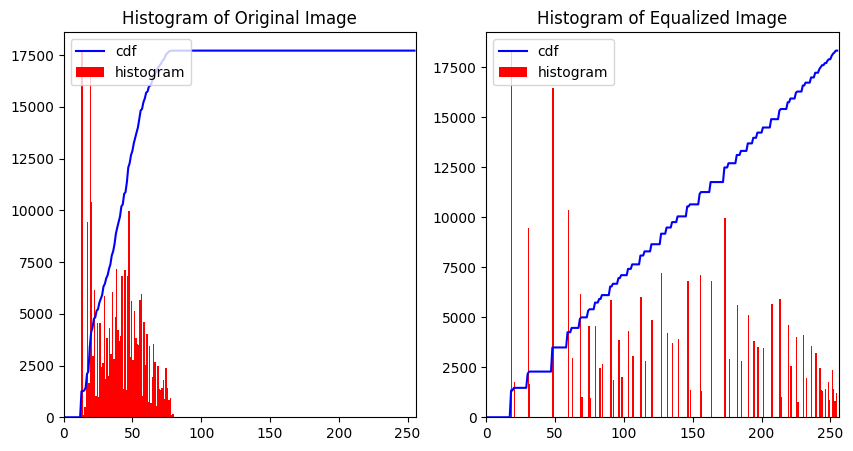

In [100]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdf_normalized, color = 'b')
ax[0].hist(img_org.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdf_equ_normalized, color = 'b')
ax[1].hist(img_equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

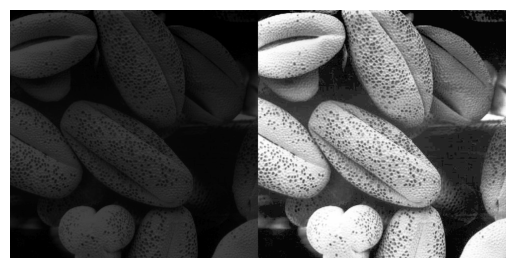

In [101]:
# Displaying the Original and Equalized Image
res = np.hstack((img_org, equ_image))
plt.axis('off')
plt.imshow(res, cmap='gray')

__Optional Method using Builtin function__ 

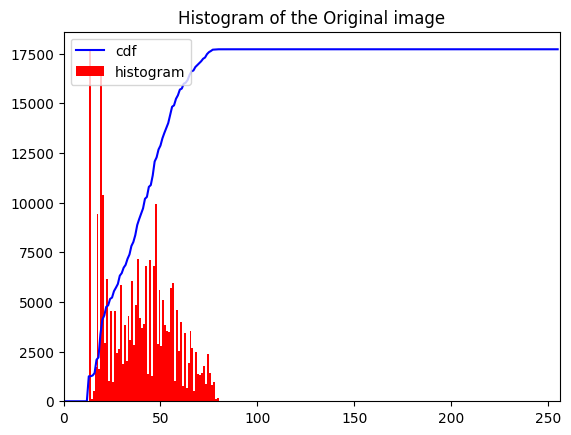

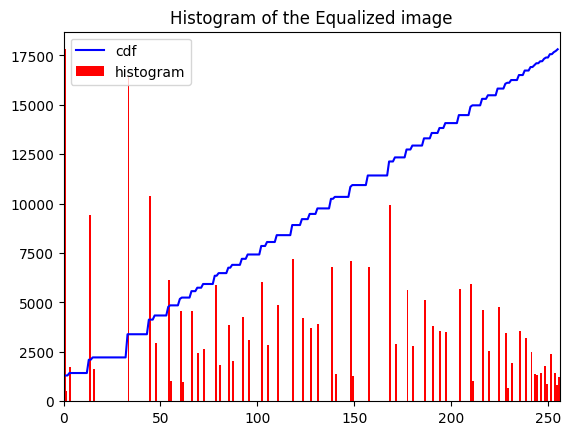

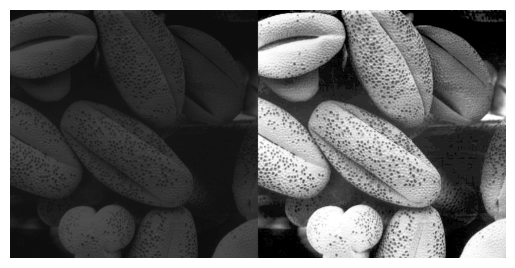

In [102]:
# Plotting the Histogram of the Original Image
hist, bins = np.histogram(img_org.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color = 'b')
# Plotting the Histogram of the Original Image
plt.hist(img_org.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Original image')
plt.show()

# Applying Histogram Equalization
img_equ = cv.equalizeHist(img_org)
hist, bins = np.histogram(img_equ.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
# Plotting the Histogram of the Equalized Image
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_equ.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized image')
plt.show()

# Displaying the Original and Equalized Image
res = np.hstack((img_org, img_equ))
plt.axis('off')
plt.imshow(res, cmap='gray')

<h1>Question 6</h1>

In [103]:
# Loading the Image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\jeniffer.jpg', cv.IMREAD_ANYCOLOR)
if img_org is None: 
    assert False, 'Image could not be read'

In [104]:
# Converting the Image to HSV Color Space
img_hsv = cv.cvtColor(img_org, cv.COLOR_BGR2HSV)
# Splitting the Image into Hue, Saturation and Value Planes
h, s, v = cv.split(img_hsv)

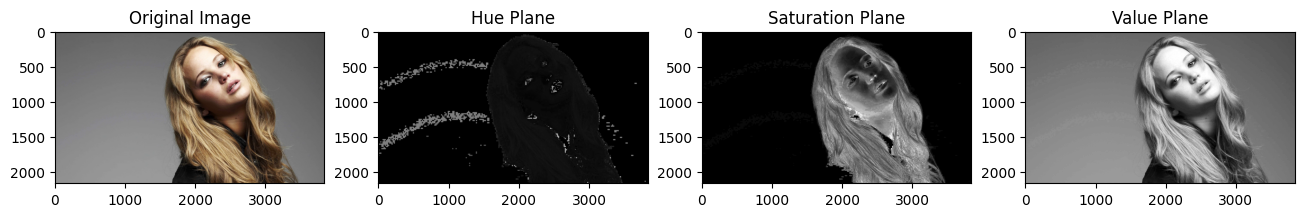

In [105]:
# Displaying the hue, saturation and value planes in grayscale
fig, ax = plt.subplots(1,4, figsize=(16,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(h, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Hue Plane")
ax[2].imshow(s, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Saturation Plane")
ax[3].imshow(v, cmap="gray", vmin=0, vmax=255)
ax[3].set_title("Value Plane")
plt.show()

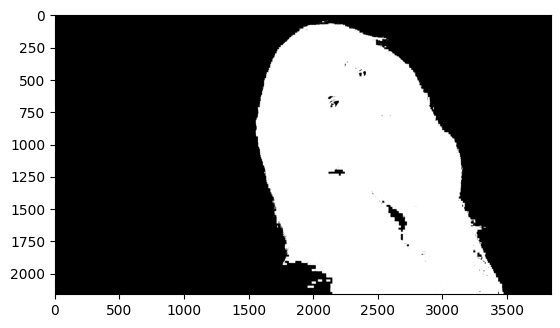

In [106]:
# Extracting Forground Mask
threshol_value = 13
foreground_mask = cv.threshold(s, threshol_value, 255, cv.THRESH_BINARY)
fig, ax = plt.subplots()
ax.imshow(foreground_mask[1], cmap="gray")